In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split

from bikesharing.ml_logic.model import get_folds, train_test_indices
from bikesharing.interface.main import *

In [ ]:
#preprocess()

In [3]:
df_X = pd.read_csv('~/.lewagon/bikesharing/data/processed/X_processed_from_2019_to_2022.csv')
df_y = pd.read_csv('~/.lewagon/bikesharing/data/processed/y_processed_from_2019_to_2022.csv')

In [4]:
df_X

,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,is_holiday,is_weekend
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,0.989739,1,0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,0.989739,1,0
2,0.359823,1.000000,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,0.989739,1,0
3,0.359823,0.987013,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,0.989739,1,0
4,0.359823,1.000000,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,0.989739,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0.426049,0.779221,0.405204,0.202532,0.000000,0.066987,0.750000,0.50,1.000000,0.500000,1.000000,0,1
35036,0.412804,0.779221,0.395911,0.172152,0.000000,0.146447,0.853553,0.50,1.000000,0.500000,1.000000,0,1
35037,0.410596,0.753247,0.390335,0.182278,0.000000,0.250000,0.933013,0.50,1.000000,0.500000,1.000000,0,1
35038,0.417219,0.714286,0.390335,0.222785,0.000000,0.370590,0.982963,0.50,1.000000,0.500000,1.000000,0,1


In [4]:
df_X_y = pd.concat((df_X, df_y) , axis=1)

In [5]:
districts = ['Altstadt-Lehel', 'Au - Haidhausen',
       'Aubing-Lochhausen-Langwied', 'Berg am Laim', 'Bogenhausen',
       'Feldmoching', 'Hadern', 'Harlaching', 'Hasenbergl-Lerchenau Ost',
       'Laim', 'Lochhausen', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
       'Milbertshofen-Am Hart', 'Moosach', 'Neuhausen-Nymphenburg',
       'Obergiesing', 'Obermenzing', 'Obersendling', 'Pasing',
       'Pasing-Obermenzing', 'Ramersdorf-Perlach', 'Schwabing-Freimann',
       'Schwabing-West', 'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark',
       'Südgiesing', 'Thalkirchen', 'Trudering', 'Trudering-Riem',
       'Untergiesing', 'Untergiesing-Harlaching', 'Untermenzing-Allach']

In [6]:
fold_dfs = get_folds(df_X_y, fold_length=FOLD_LENGTH, fold_stride=FOLD_STRIDE)

In [7]:
models = []
district_score_means = []

for dist in districts:
    scores = []
    model = LinearRegression()

    indices = [0, 1, 2, 3]
        
    for id in range(4):
        
        test_df = fold_dfs[id]
        train_folds = [fold_dfs[i] for i in indices if i != id]
        
        train_df = pd.concat(train_folds, axis=0)
        X_test = test_df.drop(columns= districts)
        y_test = test_df[dist]
        X_train = train_df.drop(columns= districts)
        y_train = train_df[dist]
        
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        # models.append
        print(f"{id} >>> {scores=}")
        
    district_score_means.append(np.mean(scores))

0 >>> scores=[0.49397162604591216]
1 >>> scores=[0.49397162604591216, 0.47132936991439844]
2 >>> scores=[0.49397162604591216, 0.47132936991439844, 0.514122578775259]
3 >>> scores=[0.49397162604591216, 0.47132936991439844, 0.514122578775259, 0.509526688195238]
0 >>> scores=[0.3726139412187024]
1 >>> scores=[0.3726139412187024, 0.4219039569323688]
2 >>> scores=[0.3726139412187024, 0.4219039569323688, 0.45721960266678785]
3 >>> scores=[0.3726139412187024, 0.4219039569323688, 0.45721960266678785, 0.39015228179754025]
0 >>> scores=[0.07598121993956142]
1 >>> scores=[0.07598121993956142, 0.03247133723662954]
2 >>> scores=[0.07598121993956142, 0.03247133723662954, 0.06920442182540809]
3 >>> scores=[0.07598121993956142, 0.03247133723662954, 0.06920442182540809, -7.308736251832807]
0 >>> scores=[0.27431970616469925]
1 >>> scores=[0.27431970616469925, 0.26692391022404716]
2 >>> scores=[0.27431970616469925, 0.26692391022404716, 0.26232323413854686]
3 >>> scores=[0.27431970616469925, 0.26692391022

In [8]:
scores_df = pd.DataFrame(district_score_means, columns=['score'], index=districts)

In [9]:
scores_df.sort_values(by=['score'], inplace=True) 

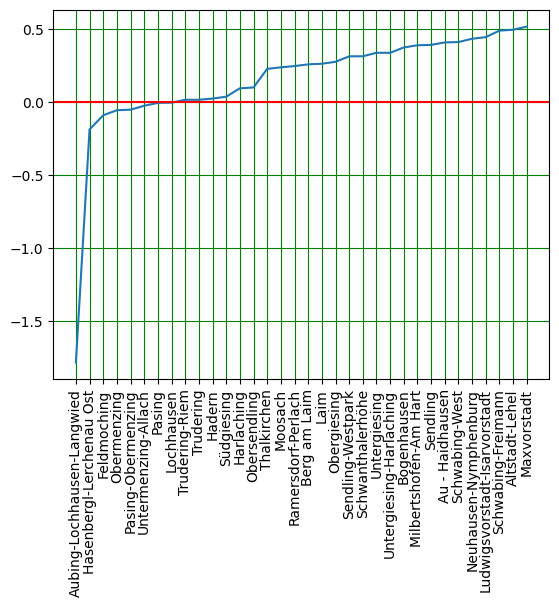

In [12]:
plt.plot(scores_df.index, scores_df['score'])
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(c='g')


plt.show()

In [13]:
print(f"mean = {np.mean(district_score_means)}")
print(f"min = {np.min(district_score_means)}")
print(f"max = {np.max(district_score_means)}")

mean = 0.1561563057675731
min = -1.782769818207802
max = 0.5187827790683892
